# Squid Game Effect ETL & EDA
<a id="toc"></a>
Table of Contents
* [1.0 Introduction - Analysis](#section_01)
* [2.0 Data Sources & ETL Process](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [3.0 Part 1 The Mystery - Unexpected Global Interest](#section_03)
* [4.0 Part 2 The Correlation Evidence](#section_04)
* [5.0 Part 3 The Smoking Gun - Squid Game Experiments](#section_05)
* [6.0 Part 4 The Geographic Proof](#section_06)
* [7.0 Part 5 The Sustained Wave - Beyond Viral Moments](#section_07)
* [8.0 Limitations & Conclusions](#section_08)
* [9.0 Credits](#section_09)

In [20]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # sets a white background with grid lines 
import plotly.express as px

In [21]:
# System and OS related tasks
import sys
import os
import importlib
# Add the project root to Python path
project_root = os.path.abspath('..')
sys.path.insert(0, project_root)

# path to directories
processed_dir = '../data/processed'

In [22]:
# import python scripts
from src.visualisation.processed_filepaths import processed_filepaths

<a id="section_01"></a>
## 1.0 Introduction - Analysis
For decades, language learning was predictable: English, Spanish and French were the languages of choice. Hoowever, in 2018, Duolingo's data detectives spotted an anomaly. They noticed that interests in Korean culture and language are surging in countries with no historical ties to Korea.

Their hyoothesis? The K-pop and K-drama effect.  Duolinga began weaving famous K-drama lines into lessons. Their latest campaign of "Learn Korean or Else" was a partnership with Netflix in late 2024 with the release of "Squid Game Season 2".

This project aims to start on a data trial to see if this is just a corporate intuition based on fads or that binge-watching K-drama is indeed becoming the world's newest Korean classrooms.

The datasets has been processed and cleaned in [Data Sources & ETL Process](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_02"></a>
## 2.0 Part 1 The Mystery - Unexpected Global Interest
During the ETL/EDA of the Duolingo data, we found out that
* The 14 countries having Korean as their top 2 langauges to learn are mostly in Asia. Hence, it does not give the impression that learning Korean language is a "global" phenomenon.
* Perhaps this is because Duolingo's data only shows the top 2 most favourite languagues in each country which ignores countries with korean langauge as their 3rd or 4th most popular languages to learn

Perhaps we should look at Google Trend regional data to see if it is indeed a global phenomenon.

## 2.1 The Entry Point: How the World Discovers Korean Content
Google trends provides the *Search Topic* "Korean Drama" and the *search term* "k-drama". Whilst Search Topics are more encompasing searches, we will include both as "k-drama" is proving to be more main steam in the recent years.
This phenonmen of the new term'K-drama', perhaps coming from the domainance of K-Pop (with its predecessor J-Pop) reveals the surge in interest to Korean content worldwide."

In [37]:
# Load your data
kdrama_past5yr_df = pd.read_csv(processed_filepaths['timeline']['kdrama']['past5yr'])
korean_drama_past5yr_df = pd.read_csv(processed_filepaths['koreandrama'])
# print(kdrama_past5yr_df.head())
# print(korean_drama_past5yr_df.head())


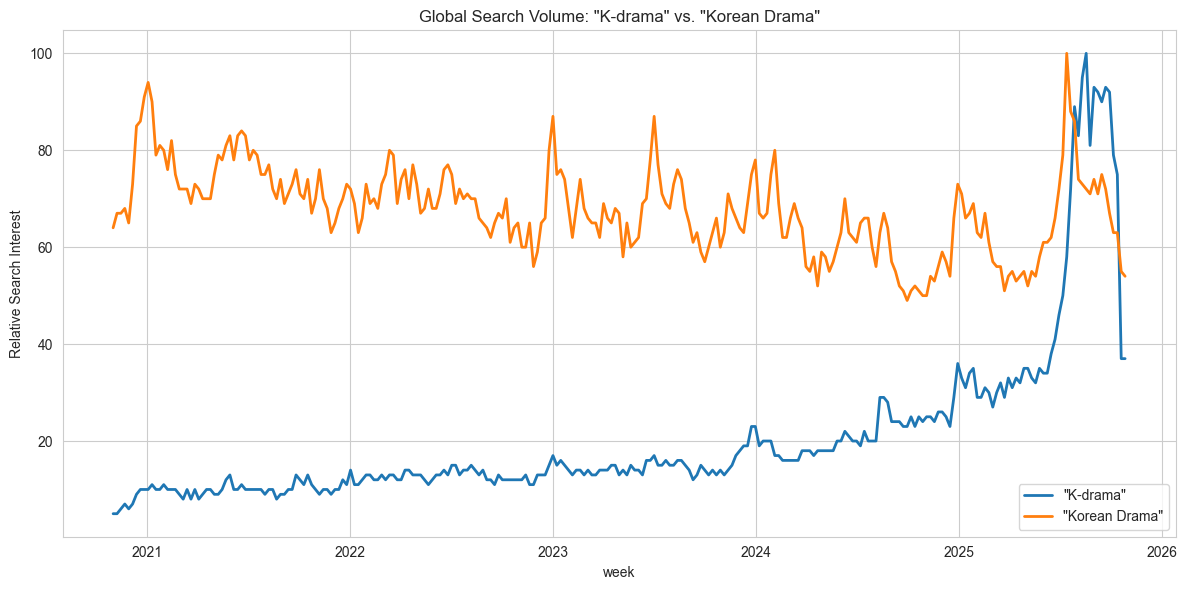

In [ ]:
# Merge them on 'week'
search_term_comparison = kdrama_past5yr_df.merge(korean_drama_past5yr_df, on='week')

# Convert 'week' to datetime
search_term_comparison['week'] = pd.to_datetime(search_term_comparison['week'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=search_term_comparison, x='week', y='kdrama_past5yr', label='"K-drama"', linewidth=2)
sns.lineplot(data=search_term_comparison, x='week', y='korean_drama_past5yr', label='"Korean Drama"', linewidth=2)
plt.title('Global Search Volume: "K-drama" vs. "Korean Drama"')
plt.ylabel('Relative Search Interest')
plt.legend()
plt.tight_layout()
plt.show()

## 2.2 "Learn Korean" a Global Phenomemon?
The Mystery Revealed: Despite 'K-drama' being the global gateway, the highest interest in learning Korean comes from unexpected regions. Hence there is some evidence suggesting entertainment is driving language demand in new markets.

In [ ]:
# Load data
learn_korean_geo_past5yr_df = pd.read_csv(processed_filepaths['geo']['learn_korean']['past5yr'])
# learn_korean_geo_past5yr_df.info()

### 2.2.1 Histogram of Countries "Learn Korean" interest ranking of at least 20

In [45]:
# Let's look at countries with interest > 20
countries_with_interest_df = (learn_korean_geo_past5yr_df
    [learn_korean_geo_past5yr_df['learn_korean_geo_past5yr'] > 20]
    .sort_values('learn_korean_geo_past5yr', ascending=False)
)

num_countries = len(countries_with_interest_df)
dynamic_height = max(600, num_countries * 25)  # 25px per country, minimum 600px

fig = px.bar(countries_with_interest_df,
             y='country',
             x='learn_korean_geo_past5yr',
             orientation='h',
             title='Countries with Search Interest > 20 for "Learn Korean"',
             labels={'learn_korean_geo_past5yr': 'Search Interest Score'},
             color='learn_korean_geo_past5yr',
             color_continuous_scale='Viridis')

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=dynamic_height,
    showlegend=False,
    title_x=0.5
)

fig.show()


## 2.2.2 Geomap Countries with Some "Learn Korean" interest

In [59]:
# Cleaner version using method chaining
fig_1a = (
    px.choropleth(
        countries_with_interest_df,
        locations='country',
        locationmode='country names',
        color='learn_korean_geo_past5yr',
        color_continuous_scale='Sunset',
        range_color=[0, 100],
        labels={'learn_korean_geo_past5yr': 'Search Interest'},
        title='<b>Part 1: The Mystery Global Search Interest for "Learn Korean" (Past 5 Years)</b>'
    )
    .update_layout(
        title_x=0.5,
        title_font_size=12,
        annotations=[dict(
            text="With markers for country with 20 or higher level of search interest",
            x=0.5, y=1.15, xref="paper", yref="paper",
            showarrow=False, font=dict(size=10, color="gray"), xanchor='center'
        )],
        coloraxis_colorbar=dict(
            len=0.5, thickness=15, x=1.02, y=0.5, 
            yanchor='middle', tickfont=dict(size=8)
        )
    )
    .update_geos(
        projection_type="natural earth",
        showcountries=True,
        countrycolor="lightgray",
        showocean=True,
        oceancolor="lightblue"
    )
)

# Add markers in one clean step
high_interest_countries = countries_with_interest_df[countries_with_interest_df['learn_korean_geo_past5yr'] >= 20]

fig_1a.add_scattergeo(
    locations=high_interest_countries['country'],
    locationmode='country names',
    marker=dict(size=8, color='red', symbol='star'),
    mode='markers',
    name="High Interest Countries",
    hoverinfo='skip'
)

fig_1a.show()

/var/folders/v2/hbdzpz01145d1p0yxb79y8f40000gn/T/ipykernel_1609/177327734.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_03"></a>
## 3.0 Part 2 The Correlation Evidence

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_04"></a>
## 4.0 Part 3 The Smoking Gun - Squid Game Experiments

In [ ]:
# Important dates for your analysis
SQUID_GAME_RELEASE = '2021-09-17'
analysis_periods = {
    'pre_squid_game': ('2019-01-01', '2021-09-16'),
    'post_squid_game': ('2021-09-17', '2024-01-01'),
    'full_period': ('2019-01-01', '2024-01-01')
}

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_05"></a>
## 5.0 Part 4 The Geographic Proof

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_06"></a>
## 6.0 Part 5 The Sustained Wave - Beyond Viral Moments

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_07"></a>
## 7.0 Limitations & Conclusions

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_08"></a>
## 8.0 Credits

###### [↩️ Back to Table of Contents](#toc)

--------------------------------